In [1]:

import rioxarray
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from glob import glob

url = r"C:\Users\tobia\OneDrive\Skrivebord\Fagprojekt\SCAMS_colocated\Nimbus6-SCAMS_1976m0301t002856_o03527_DS17_era5.nc"

xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 3MB
Dimensions:      (Time: 417, n13_obs: 13, n160_obs: 160, n4_obs: 4,
                  n12_obs: 12, n52_obs: 52, obs: 13)
Coordinates:
  * Time         (Time) datetime64[ns] 3kB 1975-12-31 ... 1976-03-01T02:26:32
  * n4_obs       (n4_obs) int64 32B 0 1 2 3
  * n12_obs      (n12_obs) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * n13_obs      (n13_obs) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * n52_obs      (n52_obs) int64 416B 0 1 2 3 4 5 6 7 ... 45 46 47 48 49 50 51
  * n160_obs     (n160_obs) int64 1kB 0 1 2 3 4 5 6 ... 154 155 156 157 158 159
  * obs          (obs) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/65)
    TACH1        (Time, n13_obs) float64 43kB ...
    TACH2        (Time, n13_obs) float64 43kB ...
    TACH3        (Time, n13_obs) float64 43kB ...
    TACH4        (Time, n13_obs) float64 43kB ...
    TACH5        (Time, n13_obs) float64 43kB ...
    TBCH1        (Time, n13_obs) float64 43kB ...
    ...           ...
    sst          (Time, obs) float64 43kB ...
    skt          (Time, obs) float64 43kB ...
    sp           (Time, obs) float64 43kB ...
    tcw          (Time, obs) float64 43kB ...
    tcwv         (Time, obs) float64 43kB ...
    era_time     (Time) datetime64[ns] 3kB ...
Attributes: (12/13)
    title:                  SCAMS Nimbus-6 L2
    references:             http://disc.gsfc.nasa.gov
    institution:            DTU
    contact:                Technical University of Denmark, Space Department...
    history:                29 Sep 2022 16:10:40 : netcdf file created, wmako...
    original_file_name:     Nimbus6-SCAMS_1976m0301t002856_o03527_DS17.txt
    ...                     ...
    southernmost_latitude:  -89.7812
    northernmost_latitude:  89.125
    westernmost_longitude:  0.03125
    easternmost_longitude:  359.969
    start_date:             1975-12-31 00:00:00
    stop_date:              1976-03-01 02:26:32

Files found: ['C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t002856_o03527_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t041848_o03524_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t051552_o03525_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t070352_o03526_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t084424_o03527_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t102824_o03528_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t121640_o03529_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t140216_o03530_DS17_era5.nc', 'C

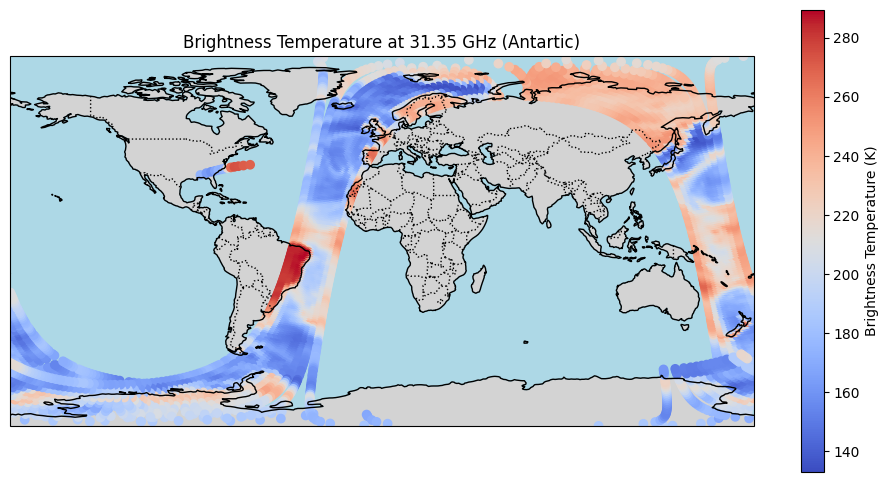

In [2]:
import os
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


year = '1976'
month = '03'
pattern = r'C:\Users\tobia\OneDrive\Skrivebord\Fagprojekt\SCAMS_colocated\Nimbus6-SCAMS_%sm%s*_era5.nc' % (year, month)
files = glob(pattern)
print("Files found:", files)


if files:
    xrds = xr.open_dataset(files[0])
    
    lat = xrds["LAT"].values
    lon = xrds["LON"].values
    tb_ch1 = xrds["TBCH1"].values

    
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, color="lightgray")
    ax.add_feature(cfeature.OCEAN, color="lightblue")

    sc = plt.scatter(lon, lat, c=tb_ch1, cmap="coolwarm", transform=ccrs.PlateCarree())
    plt.colorbar(sc, label="Brightness Temperature (K)")
    plt.title("Brightness Temperature at 31.35 GHz (Antartic)")
    
    plt.show()
else:
    print("No files found matching the pattern.")

In [4]:
import numpy as np
import xarray as xr

# Create a sample xarray.Dataset with multi-dimensional data
data = xr.Dataset({
    'LAT': (('x', 'y'), np.random.rand(3, 3)),
    'LON': (('x', 'y'), np.random.rand(3, 3)),
    'TBCH1': (('x', 'y'), np.random.rand(3, 3))
})

# Extracting values and flattening
lat_single = data['LAT'].values
lon_single = data['LON'].values
tbch1_single = data['TBCH1'].values

print("LAT values i multidimensional:", lat_single)
print("LON values:", lon_single)
print("TBCH1 values:", tbch1_single)

LAT values i multidimensional: [[0.23733526 0.30590518 0.01921755]
 [0.86822303 0.33623934 0.41680239]
 [0.93810031 0.55627828 0.25859626]]
LON values: [[0.92283261 0.32005863 0.5001277 ]
 [0.10278055 0.60803541 0.47648333]
 [0.46261185 0.83094495 0.02744185]]
TBCH1 values: [[0.32932804 0.22949509 0.43918047]
 [0.3953804  0.92110541 0.60552786]
 [0.60321637 0.16527381 0.1110108 ]]


In [5]:
print("LAT values i 1 dim:", lat_single.flatten())
print("LON values:", lon_single.flatten())
print("TBCH1 values:", tbch1_single.flatten())

LAT values i 1 dim: [0.23733526 0.30590518 0.01921755 0.86822303 0.33623934 0.41680239
 0.93810031 0.55627828 0.25859626]
LON values: [0.92283261 0.32005863 0.5001277  0.10278055 0.60803541 0.47648333
 0.46261185 0.83094495 0.02744185]
TBCH1 values: [0.32932804 0.22949509 0.43918047 0.3953804  0.92110541 0.60552786
 0.60321637 0.16527381 0.1110108 ]


Files found: ['C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t002856_o03527_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t041848_o03524_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t051552_o03525_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t070352_o03526_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t084424_o03527_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t102824_o03528_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t121640_o03529_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t140216_o03530_DS17_era5.nc', 'C

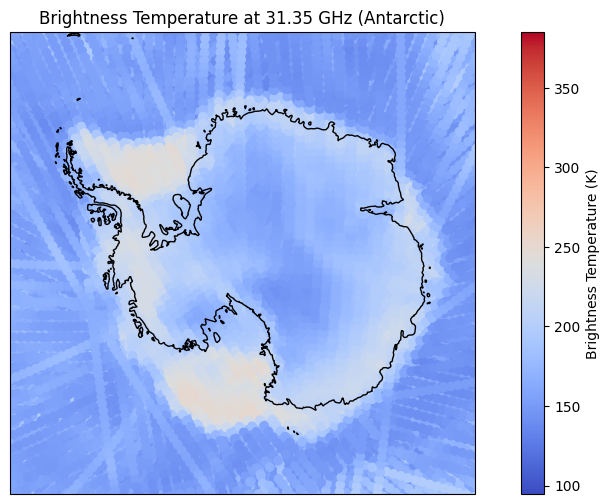

In [ ]:
import numpy as np
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

year = '1976'
month = '03'
pattern = r'C:\Users\tobia\OneDrive\Skrivebord\Fagprojekt\SCAMS_colocated\Nimbus6-SCAMS_%sm%s*_era5.nc' % (year, month)
files = glob(pattern)
print("Files found:", files)

# Printer "No files found" hvis ikke der er nogle filer fundet
if files:
    lat_comb = []
    lon_comb = []
    tbch1_comb = []

    for file in files:
        xrds = xr.open_dataset(file)
    
        lat_single = xrds["LAT"].values.flatten()
        lon_single = xrds["LON"].values.flatten()
        tbch1_single = xrds["TBCH1"].values.flatten()

        lat_comb.extend(lat_single)
        lon_comb.extend(lon_single)
        tbch1_comb.extend(tbch1_single)

    lat = np.array(lat_comb)
    lon = np.array(lon_comb)
    tb_ch1 = np.array(tbch1_comb)
    
    
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, color="green")
    ax.add_feature(cfeature.OCEAN, color="blue")

    sc = plt.scatter(lon, lat, c=tb_ch1, cmap="coolwarm", transform=ccrs.PlateCarree())
    plt.colorbar(sc, label="Brightness Temperature (K)")
    plt.title("Brightness Temperature at 31.65 GHz (Antarctic)")
    
    plt.show()
else:
    print("No files found matching the pattern.")

Files found: ['C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t002856_o03527_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t041848_o03524_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t051552_o03525_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t070352_o03526_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t084424_o03527_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t102824_o03528_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t121640_o03529_DS17_era5.nc', 'C:\\Users\\tobia\\OneDrive\\Skrivebord\\Fagprojekt\\SCAMS_colocated\\Nimbus6-SCAMS_1976m0301t140216_o03530_DS17_era5.nc', 'C

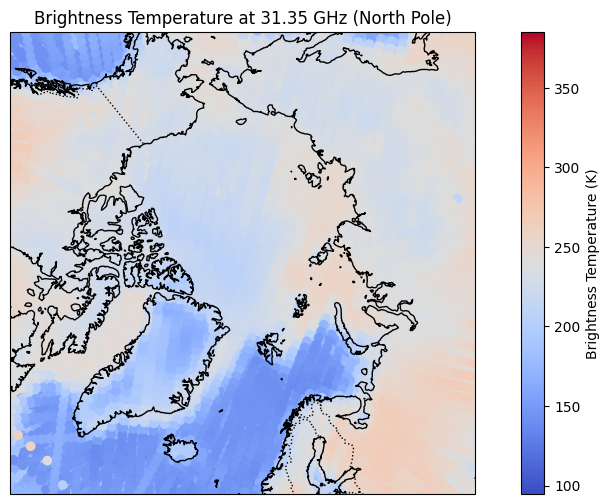

In [ ]:
year = '1976'
month = '03'
pattern = r'C:\Users\tobia\OneDrive\Skrivebord\Fagprojekt\SCAMS_colocated\Nimbus6-SCAMS_%sm%s*_era5.nc' % (year, month)
files = glob(pattern)
print("Files found:", files)

# Printer "No files found" hvis ikke der er nogle filer fundet
if files:
    lat_comb = []
    lon_comb = []
    tbch1_comb = []

    for file in files:
        xrds = xr.open_dataset(file)
    
        lat_single = xrds["LAT"].values.flatten()
        lon_single = xrds["LON"].values.flatten()
        tbch1_single = xrds["TBCH1"].values.flatten()

        lat_comb.extend(lat_single)
        lon_comb.extend(lon_single)
        tbch1_comb.extend(tbch1_single)

    lat = np.array(lat_comb)
    lon = np.array(lon_comb)
    tb_ch1 = np.array(tbch1_comb)
    
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, color="lightgray")
    ax.add_feature(cfeature.OCEAN, color="lightblue")

    sc = plt.scatter(lon, lat, c=tb_ch1, cmap="coolwarm", transform=ccrs.PlateCarree())
    plt.colorbar(sc, label="Brightness Temperature (K)")
    plt.title("Brightness Temperature at 31.65 GHz (North Pole)")
    
    plt.show()
else:
    print("No files found matching the pattern.")